# We have been provided with train and test data separately, where test data doesn’t have response values. We need to use train data to build our model and then use that model to make prediction on test data. In this we have been given data  x as train data and y as test data and we are required to predictrevenue.grid, whether it takes value 1 or not.


# Importing Libraries

In [269]:
import pandas as pd
import numpy as np

# Reading Files From The Local Disk

In [270]:
x=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 2\\rg_train.csv")
y=pd.read_csv("C:\\Users\\KATA\\Documents\\DATA SCIENCE\\DataSets 2\\rg_test.csv")

# Concating 2 Files Train and Test

In [271]:
y["Revenue.Grid"]=np.nan
x["data"]="train"
y["data"]="test"
z=pd.concat([x,y],axis=0)

# Dropping Unwanted Columns In Both The Files

In [272]:
del z["REF_NO"],z["occupation_partner"],z["self_employed_partner"],z["post_area"],z["post_code"],z["year_last_moved"],z["TVarea"],z["region"]

# Data Pre-Processing

In [273]:
z["children"].replace("Zero",0,inplace=True)
z["children"].replace("4+",4,inplace=True)

In [274]:
z["children"]=pd.to_numeric(z["children"])

In [275]:
z["age_band"]=z["age_band"].str.replace("+","",regex=True)
z["age_band"]=z["age_band"].str.replace("71","72-76",regex=True)
z["age_band"]=z["age_band"].str.replace("Unknown","77-81",regex=True)

In [276]:
k=z["age_band"].str.split("-",expand=True).astype(float)

In [277]:
z["age_band"]=0.5*(k[0]+k[1])

In [278]:
a=pd.value_counts(z["status"])
b=(a/a.sum()*100).lt(11)
z["status"]=np.where(z["status"].isin(a[b].index),"Widowed",z["status"])

In [279]:
a=pd.value_counts(z["home_status"])
b=(a/a.sum()*100).lt(4)
z["home_status"]=np.where(z["home_status"].isin(a[b].index),"Rent Privately",z["home_status"])

In [280]:
z["family_income"]=z["family_income"].str.replace("[^0-9]","",regex=True)

In [281]:
a=pd.value_counts(z["family_income"])
b=(a/a.sum()*100).lt(13)
z["family_income"]=np.where(z["family_income"].isin(a[b].index),40000,z["family_income"])

In [282]:
z["family_income"]=pd.to_numeric(z["family_income"])

In [283]:
z["Revenue.Grid"].replace(2.0,0.0,inplace=True)

In [284]:
z["Revenue.Grid"].fillna(1.0,inplace=True)

In [285]:
z["Revenue.Grid"]=z["Revenue.Grid"].astype(int)

In [286]:
a=pd.value_counts(z["occupation"])
b=(a/a.sum()*100).lt(18)
z["occupation"]=np.where(z["occupation"].isin(a[b].index),"Student",z["occupation"])

# Dropping The Target Variable In Test Data

In [287]:
x=z[z["data"]=="train"]
del x["data"]
y=z[z["data"]=="test"]
y.drop(["Revenue.Grid","data"],axis=1,inplace=True)

C:\Users\KATA\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [288]:
del z

# Building The Logistic Regression Model

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
a,b=train_test_split(x,test_size=0.2,random_state=123)

In [291]:
m=a.drop(["Revenue.Grid"],axis=1)
n=a["Revenue.Grid"]

In [292]:
from sklearn.linear_model import LogisticRegression

In [341]:
log=LogisticRegression()

In [342]:
m=pd.get_dummies(m,drop_first=True)

# Fitting The Model

In [343]:
log.fit(m,n)

C:\Users\KATA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [344]:
m1=b.drop(["Revenue.Grid"],axis=1)

In [345]:
m1=pd.get_dummies(m1,drop_first=True)

# Making Predections

In [346]:
pred=log.predict(m1)

# Evulating The Model Using Different Metrics

In [347]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [349]:
print(classification_report(b["Revenue.Grid"],pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1467
           1       0.85      0.58      0.69       158

    accuracy                           0.95      1625
   macro avg       0.90      0.79      0.83      1625
weighted avg       0.95      0.95      0.95      1625



In [350]:
print(roc_auc_score(b["Revenue.Grid"],pred))

0.7856859344395262


# Vizuvalising Roc Curve

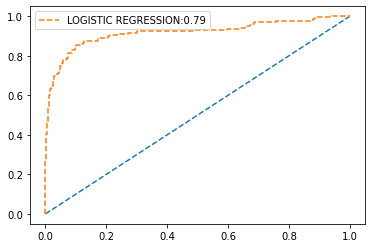

In [351]:
import matplotlib.pyplot as plt
pred1=log.predict_proba(m1) [:,1]
fpr,tpr,t=roc_curve(b["Revenue.Grid"],pred1)
plt.plot([0,1],[0,1],"--")
plt.plot(fpr,tpr,"--",label="LOGISTIC REGRESSION:"+ str(round(roc_auc_score(b["Revenue.Grid"],pred*100),2)))
plt.legend()


# Confusion Matrix 

In [357]:
v=pd.crosstab(b["Revenue.Grid"],pred)

In [358]:
v

col_0,0,1
Revenue.Grid,,
0,1451,16
1,66,92


In [359]:
tn=v.iloc[0,0]
fp=v.iloc[0,1]
fn=v.iloc[1,0]
tp=v.iloc[1,1]

In [360]:
print("FALSE POSITIVE RATE IS:",fp/(fp+tn))

FALSE POSITIVE RATE IS: 0.010906612133605999


In [361]:
print("SPECIFICITY IS:",tn/(tn+fp))

SPECIFICITY IS: 0.989093387866394
